#  **Stock Market Prediction using CNN-based Modeling**

# **Introduction**

**Final Project: CNN-Based Stock Market Prediction**
The objective of this project is to use a Convolutional Neural Network (CNN) to forecast stock market trends and display the results on an interactive dashboard.

**Goals**:
1. Create and train a CNN model that uses historical data to forecast stock prices.
2. Create an interactive dashboard to show the difference between the actual and expected stock prices.
3. By displaying performance metrics such as MAE and MSE, you can give financial analysts actionable insights.

The code is organized into the following sections:
1. Data Preprocessing
2. Model Development and Training
3. Performance Evaluation
4. Interactive Visualization


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
url = "C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_RUSSELL.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_S&P.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_DJI.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_NASDAQ.csv"
"C:/Users/tejat/Downloads/cnnpred+cnn+based+stock+market+prediction+using+a+diverse+set+of+variables/Processed_NYSE.csv"
df = pd.read_csv(url)

# Inspect initial data
print("Initial DataFrame shape:", df.shape)
print(df.head())
print(df.dtypes)


Initial DataFrame shape: (1984, 84)
         Date       Close    Volume       mom      mom1      mom2      mom3  \
0  2009-12-31  625.390015       NaN       NaN       NaN       NaN       NaN   
1  2010-01-04  640.099976  0.921723  0.023521       NaN       NaN       NaN   
2  2010-01-05  638.489990 -0.375903 -0.002515  0.023521       NaN       NaN   
3  2010-01-06  637.950012  0.996234 -0.000846 -0.002515  0.023521       NaN   
4  2010-01-07  641.969971  0.059932  0.006301 -0.000846 -0.002515  0.023521   

   ROC_5  ROC_10  ROC_15  ...   NZD  silver-F  RUSSELL-F  S&P-F   CHF  \
0    NaN     NaN     NaN  ...  0.03      0.26      -1.08  -1.00 -0.11   
1    NaN     NaN     NaN  ...  1.52      3.26       1.61   1.62 -0.57   
2    NaN     NaN     NaN  ... -0.07      1.96      -0.20   0.31  0.43   
3    NaN     NaN     NaN  ...  0.56      2.15      -0.02   0.07 -0.56   
4    NaN     NaN     NaN  ... -0.72      0.94       0.50   0.40  0.58   

   Dollar index-F  Dollar index  wheat-F   XAG   X

In [16]:
# Drop non-numeric columns (e.g., 'Date')
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns if they aren’t needed
df = df.drop(non_numeric_cols, axis=1)

Non-numeric columns: Index(['Date', 'Name'], dtype='object')


In [17]:
# Replace NaN values with column means or other imputation strategy
df.fillna(df.mean(), inplace=True)

print("DataFrame shape after cleaning:", df.shape)

print("Column names in the dataset:", df.columns)

DataFrame shape after cleaning: (1984, 82)
Column names in the dataset: Index(['Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10',
       'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB4WK',
       'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA', 'DBAA', 'GBP',
       'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM', 'MSFT', 'WFC',
       'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC', 'SSEC', 'S&P',
       'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2', 'DE4', 'DE5',
       'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'AUD', 'Brent', 'CAC-F', 'copper-F',
       'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F', 'gold-F', 'HSI-F',
       'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD', 'silver-F',
       'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F', 'Dollar index',
       'wheat-F', 'XAG', 'XAU'],
      dtype='object')


## Step 1: Data Preprocessing
**Description**:
The CNN model's data preparation is covered in this section. The tasks consist of:
1. Handling missing values.
2. Scaling features for normalization.
3. The dataset is reshaped to meet CNN input requirements.

**Outputs**:
- `X_train` and `X_test`: Feature matrices for training and testing.
- `y_train` and `y_test`: Target variables for training and testing.


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features for CNN model
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split the dataset into features (X) and target (y)
target_column = 'Close'  # Replace 'Close' with your actual target variable
X = df_scaled.drop(target_column, axis=1)
y = df_scaled[target_column]

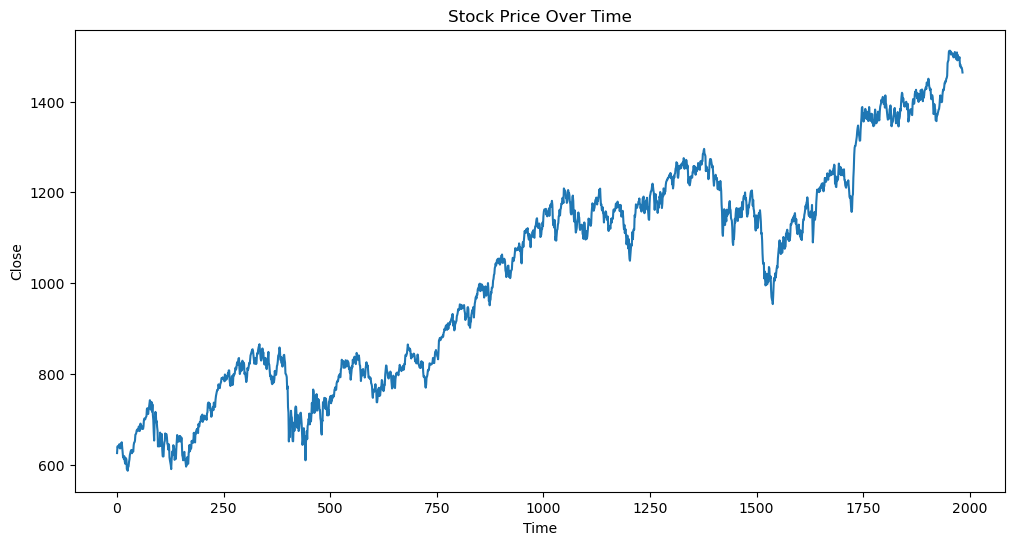

In [19]:
## Basic Data Visualization for Trends (Optional)
## This part is optional but useful for understanding the trends in stock prices

plt.figure(figsize=(12, 6))
plt.plot(df[target_column])
plt.title('Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.show()

In [20]:
import numpy as np
print("NumPy version:", np.__version__)

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (CNN requires 3D input: samples, time steps, features)
X_train_cnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))


NumPy version: 1.26.4


## Step 2: CNN Model Development and Training
**Description**:
In this section, a CNN model for stock market prediction is defined and trained.
1. Time-series data is analyzed by convolutional layers to identify patterns.
2. While keeping important information intact, pooling layers decrease dimensionality.
3. Final predictions are made by dense layers.

**Outputs**:
- A CNN model that has been trained to forecast stock prices.
- Using training and validation loss plots, model performance can be tracked.

**Key Parameters**:
- Optimizer: Adam
- Loss Function: Mean Squared Error (MSE)
- Epochs: 50


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


C:\Users\tejat\anaconda3\envs\indata_fa24\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [22]:
# Train the model
history = model.fit(X_train_cnn, y_train, epochs=50, validation_data=(X_test_cnn, y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0858 - val_loss: 0.0050
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - val_loss: 7.4252e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 8.9808e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 4.3877e-04
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 4.1299e-04
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0010 - val_loss: 8.3423e-04
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.7088e-04 - val_loss: 3.2460e-04
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4057e-04 - val_loss: 4.4499e-04
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.3181e-04 - val_loss: 0.0016
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.5364e-04 - val_loss: 2.8099e-04
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4810e-04 - val_loss: 3.3816e-04
Epoch 1

## Step 3: Model Performance Evaluation
**Description**:
In this section, the performance of the trained model is assessed using:
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Residual analysis to visualize prediction errors.

**Outputs**:
- Performance metrics (MAE, MSE).
- Using a residual plot, one can find differences between the actual and expected values.


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1052e-04
Model Loss: 0.00011572963558137417


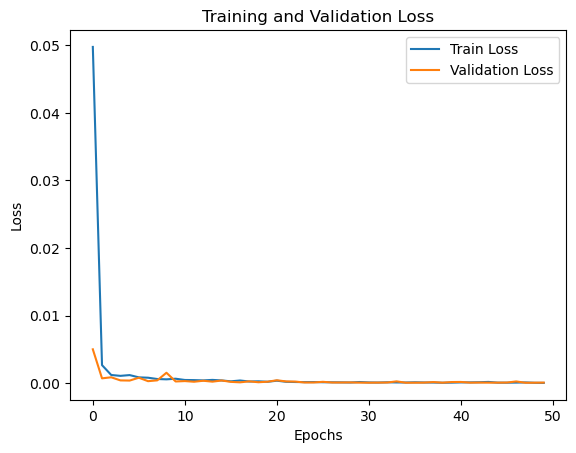

In [23]:
# Evaluate model
loss = model.evaluate(X_test_cnn, y_test)
print(f'Model Loss: {loss}')

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## Step 4: Interactive Visualization Dashboard
**Description**:
Financial analysts can examine the interactive dashboard created in this section:
1. Actual vs. Predicted stock prices dynamically.
2. For error analysis, residual plots are used.
3. Summary metrics (MAE, MSE) based on user-selected filters.

**Features**:
- **Dropdown Menu**: Select stock symbols for analysis.
- **Date Range Slider**: Filter data by specific timeframes.
- **Dynamic Graphs**: Visualize trends and evaluate model accuracy.

**Tools**:
- **Dash and Plotly**: In order to develop interactive visualizations.
- **Callbacks**: To dynamically modify metrics and graphs in response to user input.

**Note**:
Run the app using `app.run_server()` and access it in your browser.


In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Load predicted data (replace with your actual data)
df_predictions = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Stock_Symbol': ['AAPL'] * 50 + ['GOOGL'] * 50,
    'Actual_Price': np.random.uniform(100, 500, 100),
    'Predicted_Price': np.random.uniform(100, 500, 100)
})


In [25]:
# Initialize the Dash app
app = Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Stock Market Prediction Dashboard", style={'textAlign': 'center'}),
    html.Div([
        html.Label("Select Stock Symbol:"),
        dcc.Dropdown(
            id='stock-dropdown',
            options=[{'label': symbol, 'value': symbol} for symbol in df_predictions['Stock_Symbol'].unique()],
            value='AAPL',  # Default value
            style={'width': '50%'}
        ),
        html.Label("Select Date Range:"),
        dcc.RangeSlider(
            id='date-slider',
            min=0,
            max=len(df_predictions['Date']) - 1,
            value=[0, len(df_predictions['Date']) - 1],
            marks={i: date.strftime('%Y-%m-%d') for i, date in enumerate(df_predictions['Date'])},
            step=1
        )
    ], style={'margin': '20px'}),
    dcc.Graph(id='price-graph'),
    html.Div(id='summary-metrics', style={'margin': '20px'})
])

In [26]:
@app.callback(
    [Output('price-graph', 'figure'),
     Output('summary-metrics', 'children')],
    [Input('stock-dropdown', 'value'),
     Input('date-slider', 'value')]
)
def update_dashboard(stock_symbol, date_range):
    # Filter data based on stock symbol and date range
    filtered_data = df_predictions[
        (df_predictions['Stock_Symbol'] == stock_symbol) &
        (df_predictions.index >= date_range[0]) &
        (df_predictions.index <= date_range[1])
    ]
    
    # Create the graph
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=filtered_data['Date'], y=filtered_data['Actual_Price'],
        mode='lines+markers', name='Actual Price'
    ))
    fig.add_trace(go.Scatter(
        x=filtered_data['Date'], y=filtered_data['Predicted_Price'],
        mode='lines+markers', name='Predicted Price'
    ))
    fig.update_layout(title="Stock Prices: Actual vs Predicted",
                      xaxis_title='Date', yaxis_title='Stock Price',
                      legend_title="Legend")
    
    # Calculate summary metrics
    mae = np.mean(np.abs(filtered_data['Actual_Price'] - filtered_data['Predicted_Price']))
    mse = np.mean((filtered_data['Actual_Price'] - filtered_data['Predicted_Price'])**2)
    metrics = [
        html.P(f"Mean Absolute Error (MAE): {mae:.2f}"),
        html.P(f"Mean Squared Error (MSE): {mse:.2f}")
    ]
    
    return fig, metrics


In [27]:
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

# Conclusion
With the help of interactive visualization and machine learning, this project offers useful insights into stock market forecasts.

## Key Takeaways:
1. CNNs perform well on time-series forecasting tasks, such as predicting stock prices.
2. Users can explore predictions and dynamically assess model performance with interactive dashboards, which improve usability.
3. Future enhancements will incorporate real-time prediction capabilities and external data sources.
